Load and Explore the Dataset
- Visualize and understand the MNIST dataset

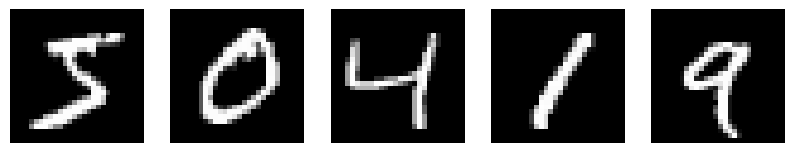

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display a few images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
plt.show()


Pre-Process the Data
- Normalize pixel values to [0,1]
- Reshape images to fit the model input
- Convert labels to categorical format

In [3]:
from tensorflow.keras.utils import to_categorical

# Normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


Build and Train the Model - Model architecture: CNN

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


C:\Users\kasiv\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 24ms/step - accuracy: 0.8573 - loss: 0.4438 - val_accuracy: 0.9843 - val_loss: 0.0480
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9741 - loss: 0.0877 - val_accuracy: 0.9891 - val_loss: 0.0347
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9818 - loss: 0.0620 - val_accuracy: 0.9900 - val_loss: 0.0294
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9862 - loss: 0.0456 - val_accuracy: 0.9912 - val_loss: 0.0262
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9884 - loss: 0.0375 - val_accuracy: 0.9911 - val_loss: 0.0254
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9897 - loss: 0.0350 - val_accuracy: 0.9929 - val_loss: 0.0244
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9908 - loss: 0.0303 - val_accuracy: 0.9919 - val_loss: 0.0281
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9924 -

Save the trained model 

In [7]:
model.save("models/my_mnist_model.keras")


Evaluate the model

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9902 - loss: 0.0362
Test accuracy: 99.24%


Plot confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


<Axes: >

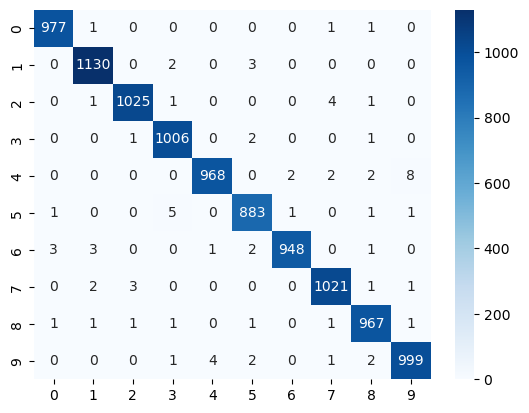

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")


In [13]:
!python inference.py --image "notebooks\number4.png"


1/1 ==================== 0s 113ms/step
1/1 ==================== 0s 126ms/step
Predicted Digit: 4


2025-03-01 00:51:12.675454: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-01 00:51:14.379195: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-01 00:51:20.733606: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
